In [1]:
# Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [77]:
resp = pd.read_csv('path/responses.csv')
resp = resp.drop('Timestamp', axis=1)
resp = resp.drop('YesPlayed', axis=1)
resp = resp.drop('Which part or scene you feel irrelevant? (If you answered Yes please ignore)', axis=1)
resp = resp.drop('Please specify if the error occurred. (If you answered No please ignore)', axis=1)
resp = resp.drop('If you answered No, please specify', axis=1)
resp = resp.drop('Is there any improvement you would like to suggest?', axis=1)
resp = resp.drop('If so, Why? (You can ignore if you don\'t have or unsure)', axis=1)
resp = resp.drop('Which scene or part you feel triggered? (If you answered Yes please ignore)', axis=1)


resp.head(10)

,Gender,Age Group,Play OtherVN?,Is the main menu hard to navigate?,Is it hard to navigate the menu panel during the game?,Is it hard to see the game menu at the bottom?,Is it hard to see the location indicator during the game?,Are you aware there is a notification popup when you made a decision?,Do you think the images relevant for each scene?,Does any of the image trigger you? (Makes you feel uncomfortable or unease),...,Are you aware to use the ESC key to go to the menu panel?,Are you aware that you can return to the previous screen during gameplay?,Are you aware that you can fast-forward the scenes?,Does the game easy to play?,Do you think the storyline is relevant to anxiety?,Do you feel anxious or unease after playing the game?,Have you ever feels like committing suicide?,Do you think you have anxiety?,Do you have more understanding of Anxiety after playing the game?,Do you feel or experience how an anxiety patient feels after playing the game?
0,Male,22 - 30,Yes,No,No,No,No,Yes,No,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Maybe,Yes,Yes,Yes
1,Male,22 - 30,Yes,No,No,No,No,Yes,Yes,No,...,Yes,Yes,Yes,Yes,Yes,Maybe,Maybe,Maybe,Yes,Yes
2,Male,22 - 30,No,No,No,No,No,Yes,No,Yes,...,NaN,NaN,NaN,No,No,No,No,No,No,Yes
3,Male,22 - 30,Yes,No,No,No,No,Yes,Yes,No,...,NaN,NaN,NaN,Yes,Yes,Maybe,Maybe,Maybe,Yes,Yes
4,Male,22 - 30,No,No,No,No,No,No,Yes,No,...,NaN,NaN,NaN,Yes,Yes,No,No,No,Yes,No
5,Male,13 - 21,No,No,No,No,No,Yes,Yes,No,...,NaN,NaN,NaN,Yes,Yes,No,No,No,Yes,Yes
6,Male,22 - 30,Yes,No,No,No,No,Yes,Yes,No,...,Yes,Yes,Yes,Yes,Yes,No,Maybe,Maybe,Yes,Yes
7,Male,13 - 21,No,No,No,Yes,No,No,No,No,...,NaN,NaN,NaN,Yes but not really,Yes,Maybe,No,No,Yes,Yes
8,Female,13 - 21,No,No,No,Yes,No,Yes,Yes,No,...,NaN,NaN,NaN,Yes but not really,Yes,Maybe,Maybe,Yes,Yes,Yes
9,Female,13 - 21,No,No,No,No,No,Yes,Yes,No,...,NaN,NaN,NaN,Yes but not really,Yes,Yes,Yes,Yes,No,No


In [78]:
resp = resp.rename(columns={'Is the main menu hard to navigate?': '1'})
resp = resp.rename(columns={'Is it hard to navigate the menu panel during the game?': '2'})
resp = resp.rename(columns={'Is it hard to see the game menu at the bottom?': '3'})
resp = resp.rename(columns={'Is it hard to see the location indicator during the game? ': '4'})
resp = resp.rename(columns={'Are you aware there is a notification popup when you made a decision?': '5'})
resp = resp.rename(columns={'Do you think the images relevant for each scene?': '6'})
resp = resp.rename(columns={'Does any of the image trigger you? (Makes you feel uncomfortable or unease)': '7'})
resp = resp.rename(columns={'Do you encounter any errors during the game?': '8'})
resp = resp.rename(columns={'Do you use any of the shortcuts without using the menu?': '9'})
resp = resp.rename(columns={'Is it difficult to use the shortcut keys?': '10'})
resp = resp.rename(columns={'Are you aware to use the ESC key to go to the menu panel?': '11'})
resp = resp.rename(columns={'Are you aware that you can return to the previous screen during gameplay?': '12'})
resp = resp.rename(columns={'Are you aware that you can fast-forward the scenes?': '13'})
resp = resp.rename(columns={'Does the game easy to play?': '14'})
resp = resp.rename(columns={'Do you think the storyline is relevant to anxiety?': '15'})
resp = resp.rename(columns={'Do you feel anxious or unease after playing the game?': '16'})
resp = resp.rename(columns={'Have you ever feels like committing suicide?': '17'})
resp = resp.rename(columns={'Do you think you have anxiety?': '18'})
resp = resp.rename(columns={'Do you have more understanding of Anxiety after playing the game?': '19'})
resp = resp.rename(columns={'Do you feel or experience how an anxiety patient feels after playing the game?': '20'})

resp.head()


,Gender,Age Group,Play OtherVN?,1,2,3,4,5,6,7,...,11,12,13,14,15,16,17,18,19,20
0,Male,22 - 30,Yes,No,No,No,No,Yes,No,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Maybe,Yes,Yes,Yes
1,Male,22 - 30,Yes,No,No,No,No,Yes,Yes,No,...,Yes,Yes,Yes,Yes,Yes,Maybe,Maybe,Maybe,Yes,Yes
2,Male,22 - 30,No,No,No,No,No,Yes,No,Yes,...,NaN,NaN,NaN,No,No,No,No,No,No,Yes
3,Male,22 - 30,Yes,No,No,No,No,Yes,Yes,No,...,NaN,NaN,NaN,Yes,Yes,Maybe,Maybe,Maybe,Yes,Yes
4,Male,22 - 30,No,No,No,No,No,No,Yes,No,...,NaN,NaN,NaN,Yes,Yes,No,No,No,Yes,No


In [4]:
# Fill null values with None

resp.fillna('None',inplace = True)

In [5]:
resp.isnull().sum()

Gender           0
Age Group        0
Play OtherVN?    0
1                0
2                0
3                0
4                0
5                0
6                0
7                0
8                0
9                0
10               0
11               0
12               0
13               0
14               0
15               0
16               0
17               0
18               0
dtype: int64

In [41]:
# Does people have/not have anxiety feels anxious while playing

doyoufeelanxiety = pd.DataFrame()
doyoufeelanxiety['FeelsAnxiety'] = resp['18']
doyoufeelanxiety['FeelsAnxious'] = resp['16']
doyoufeelanxiety

,FeelsAnxiety,FeelsAnxious
0,Yes,Yes
1,Maybe,Maybe
2,No,No
3,Maybe,Maybe
4,No,No
5,No,No
6,Maybe,No
7,No,Maybe
8,Yes,Maybe
9,Yes,Yes


In [62]:
a = (doyoufeelanxiety.FeelsAnxiety == "No").sum() / (doyoufeelanxiety.FeelsAnxiety).shape[0]
b = (doyoufeelanxiety.FeelsAnxiety == "Yes").sum() / (doyoufeelanxiety.FeelsAnxiety).shape[0]
c = (doyoufeelanxiety.FeelsAnxiety == "Maybe").sum() / (doyoufeelanxiety.FeelsAnxiety).shape[0]

0.44

In [77]:
count = 0
for i in range(len(doyoufeelanxiety)):
    if (doyoufeelanxiety.FeelsAnxiety[i] == 'No' and doyoufeelanxiety.FeelsAnxious[i] == 'Maybe'):
#         if (doyoufeelanxiety.FeelsAnxious[i] == 'Maybe'):
        count += 1

count

1

In [66]:
# Does new/old player able to see the menu/location indicator/notification popup?

isitVisible = pd.DataFrame()



25

In [36]:
# Those have/have nt play VN before thinks that our game is easy/hard to play

newPlayers = pd.DataFrame()
newPlayers['PlayOtherVN'] = resp['Play OtherVN?']
newPlayers['EasyToPlay'] = resp['14']
# newPlayers.replace(to_replace='Yes but not really', value='Yes', inplace=True)
newPlayers

,PlayOtherVN,EasyToPlay
0,Yes,Yes
1,Yes,Yes
2,No,No
3,Yes,Yes
4,No,Yes
5,No,Yes
6,Yes,Yes
7,No,Yes but not really
8,No,Yes but not really
9,No,Yes but not really


In [34]:
count = 0
countTotalNo = 0
for i in range(len(newPlayers)):
    if (newPlayers.PlayOtherVN[i] == 'No'):
        countTotalNo += 1
    if (newPlayers.PlayOtherVN[i] == 'No' and newPlayers.EasyToPlay[i] == 'Yes'):
        count += 1
a = count / countTotalNo
a

arraya = [count, countTotalNo - count]

#### Those first time players think is easy to play GRAPH

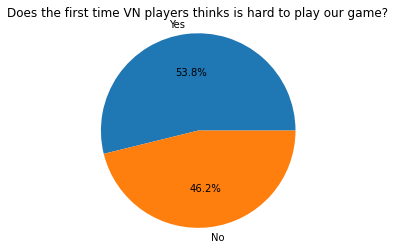

In [35]:
# Those have not played other VN game and think is easy to play graph

my_labels = 'Yes','No'
plt.pie(arraya,labels=my_labels,autopct='%1.1f%%')
plt.title('Does the first time VN players thinks is hard to play our game?')
plt.axis('equal')
plt.show()

#### Those veteran player think is easy to play GRAPH

In [41]:
count = 0
countTotalNo = 0
for i in range(len(newPlayers)):
    if (newPlayers.PlayOtherVN[i] == 'Yes'):
        countTotalNo += 1
    if (newPlayers.PlayOtherVN[i] == 'Yes' and newPlayers.EasyToPlay[i] == 'Yes'):
        count += 1
a = count / countTotalNo
a

arraya = [count, countTotalNo - count]

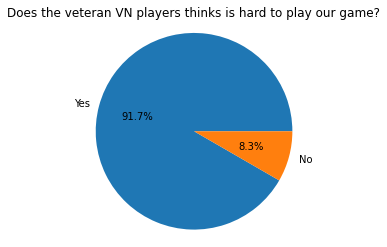

In [43]:
# Those have played other VN game play and think is easy to play graph

my_labels = 'Yes','No'
plt.pie(arraya,labels=my_labels,autopct='%1.1f%%')
plt.title('Does the veteran VN players thinks is hard to play our game?')
plt.axis('equal')
plt.show()

In [45]:
# Those have/have nt play VN before thinks that our game is easy/hard to play

newPlayersUI = pd.DataFrame()
newPlayersUI['PlayOtherVN'] = resp['Play OtherVN?']
newPlayersUI['HardSeeMenuBottom'] = resp['3']
newPlayersUI['HardSeeLocationIndicator'] = resp['4']
newPlayersUI['HardSeeNotification'] = resp['5']
# newPlayers.replace(to_replace='Yes but not really', value='Yes', inplace=True)
newPlayersUI

,PlayOtherVN,HardSeeMenuBottom,HardSeeLocationIndicator,HardSeeNotification
0,Yes,No,No,Yes
1,Yes,No,No,Yes
2,No,No,No,Yes
3,Yes,No,No,Yes
4,No,No,No,No
5,No,No,No,Yes
6,Yes,No,No,Yes
7,No,Yes,No,No
8,No,Yes,No,Yes
9,No,No,No,Yes


In [52]:
# Does new player think is hard to see the GUI labels?

hardCount = 0
countTotalNo = 0
for i in range(len(newPlayers)):
    if (newPlayersUI.PlayOtherVN[i] == 'No'):
        countTotalNo += 1
    if (newPlayersUI.PlayOtherVN[i] == 'No' and newPlayersUI.HardSeeMenuBottom[i] == 'No' and newPlayersUI.HardSeeLocationIndicator[i] == 'No' and newPlayersUI.HardSeeNotification[i] == 'No'):
        hardCount += 1
a = hardCount / countTotalNo

arraya = [hardCount, countTotalNo - hardCount]

a

0.23076923076923078

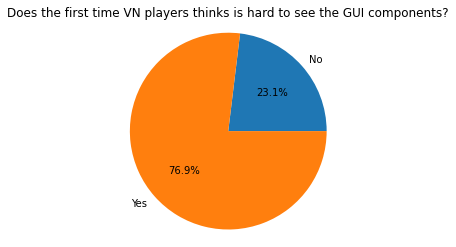

In [54]:
# Those have not played other VN game play and think is hard to see the GUI components

my_labels = 'No','Yes'
plt.pie(arraya,labels=my_labels,autopct='%1.1f%%')
plt.title('Does the first time VN players thinks is hard to see the GUI components?')
plt.axis('equal')
plt.show()

In [55]:
hardMenuCount = 0
hardNotiCount = 0
hardLocateCount = 0
countTotalNo = 0
for i in range(len(newPlayers)):
    if (newPlayersUI.PlayOtherVN[i] == 'No'):
        countTotalNo += 1
        if (newPlayersUI.HardSeeMenuBottom[i] == 'No'):
            hardMenuCount += 1
            
        if (newPlayersUI.HardSeeLocationIndicator[i] == 'No'):
            hardLocateCount += 1
            
        if (newPlayersUI.HardSeeNotification[i] == 'No'):
            hardNotiCount += 1
            
menu = hardMenuCount / countTotalNo
noti = hardNotiCount / countTotalNo
locate = hardLocateCount / countTotalNo



arrayMenu = [menu, noti, locate]

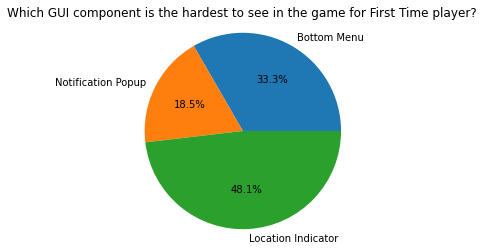

In [57]:
my_labels = 'Bottom Menu','Notification Popup', 'Location Indicator'
plt.pie(arrayMenu,labels=my_labels,autopct='%1.1f%%')
plt.title('Which GUI component is the hardest to see in the game for First Time player?')
plt.axis('equal')
plt.show()

In [62]:
# Does vetran player think is hard to see the GUI labels?

hardCount = 0
countTotalNo = 0
for i in range(len(newPlayers)):
    if (newPlayersUI.PlayOtherVN[i] == 'Yes'):
        countTotalNo += 1
    if (newPlayersUI.PlayOtherVN[i] == 'Yes' and newPlayersUI.HardSeeMenuBottom[i] == 'No' and newPlayersUI.HardSeeLocationIndicator[i] == 'No' and newPlayersUI.HardSeeNotification[i] == 'No'):
        hardCount += 1
a = hardCount / countTotalNo

arraya = [hardCount, countTotalNo - hardCount]

countTotalNo

12

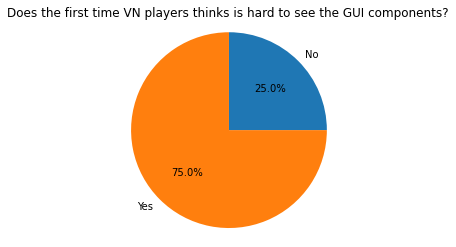

In [60]:
# Those have  played other VN game play and think is hard to see the GUI components

my_labels = 'No','Yes'
plt.pie(arraya,labels=my_labels,autopct='%1.1f%%')
plt.title('Does the veteran VN players thinks is hard to see the GUI components?')
plt.axis('equal')
plt.show()

In [63]:
hardMenuCount = 0
hardNotiCount = 0
hardLocateCount = 0
countTotalNo = 0
for i in range(len(newPlayers)):
    if (newPlayersUI.PlayOtherVN[i] == 'Yes'):
        countTotalNo += 1
        if (newPlayersUI.HardSeeMenuBottom[i] == 'No'):
            hardMenuCount += 1
            
        if (newPlayersUI.HardSeeLocationIndicator[i] == 'No'):
            hardLocateCount += 1
            
        if (newPlayersUI.HardSeeNotification[i] == 'No'):
            hardNotiCount += 1
            
menu = hardMenuCount / countTotalNo
noti = hardNotiCount / countTotalNo
locate = hardLocateCount / countTotalNo



arrayMenu = [menu, noti, locate]

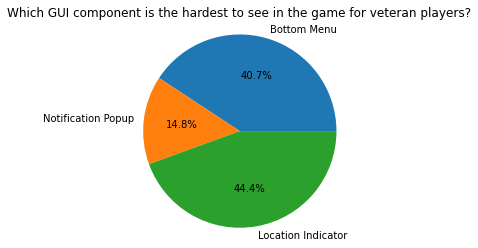

In [65]:
my_labels = 'Bottom Menu','Notification Popup', 'Location Indicator'
plt.pie(arrayMenu,labels=my_labels,autopct='%1.1f%%')
plt.title('Which GUI component is the hardest to see in the game for veteran players?')
plt.axis('equal')
plt.show()

In [ ]:
hardCount = 0
countTotalNo = 0
for i in range(len(newPlayers)):
    if (newPlayersUI.PlayOtherVN[i] == 'Yes'):
        countTotalNo += 1
    if (newPlayersUI.PlayOtherVN[i] == 'Yes' and newPlayersUI.HardSeeMenuBottom[i] == 'No' and newPlayersUI.HardSeeLocationIndicator[i] == 'No' and newPlayersUI.HardSeeNotification[i] == 'No'):
        hardCount += 1
a = count / countTotalNo
a

arraya = [count, countTotalNo - count]

In [ ]:
#### After playing do player understand anxiety?

In [79]:
# Those have/have nt play VN before thinks that our game is easy/hard to play

playerFeelAnxiety = pd.DataFrame()
playerFeelAnxiety['UnderstandAnxiety'] = resp['19']
playerFeelAnxiety['FeelsAnxiety'] = resp['20']
playerFeelAnxiety['HaveAnxiety'] = resp['18']
# newPlayers.replace(to_replace='Yes but not really', value='Yes', inplace=True)
playerFeelAnxiety

,UnderstandAnxiety,FeelsAnxiety,HaveAnxiety
0,Yes,Yes,Yes
1,Yes,Yes,Maybe
2,No,Yes,No
3,Yes,Yes,Maybe
4,Yes,No,No
5,Yes,Yes,No
6,Yes,Yes,Maybe
7,Yes,Yes,No
8,Yes,Yes,Yes
9,No,No,Yes


In [ ]:
#### Total of players that feel anxiety and understand anxiety at thge same time

In [93]:
count = 0
countTotalNo = 0
for i in range(len(playerFeelAnxiety)):
    if (playerFeelAnxiety.FeelsAnxiety[i] == 'Yes' and playerFeelAnxiety.UnderstandAnxiety[i] == 'Yes'):
        count += 1
a = count / len(playerFeelAnxiety)
a

arraya = [count, len(playerFeelAnxiety) - count]

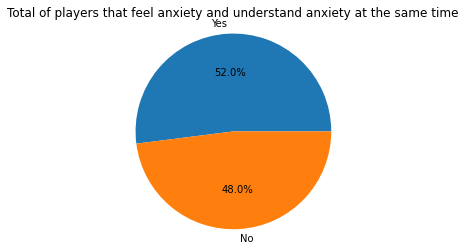

In [94]:
# Total of players that feel anxiety and understand anxiety at thge same time

my_labels = 'Yes','No'
plt.pie(arraya,labels=my_labels,autopct='%1.1f%%')
plt.title('Total of players that feel anxiety and understand anxiety at the same time')
plt.axis('equal')
plt.show()

In [87]:
count = 0
countTotalNo = 0
for i in range(len(playerFeelAnxiety)):
    if (playerFeelAnxiety.HaveAnxiety[i] == 'No'):
        countTotalNo += 1
    if (playerFeelAnxiety.HaveAnxiety[i] == 'No' and playerFeelAnxiety.UnderstandAnxiety[i] == 'Yes'):
        count += 1
a = count / countTotalNo
a

arraya = [count, countTotalNo - count]

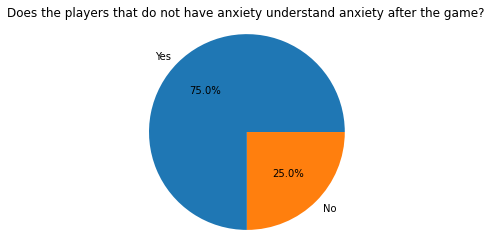

Total No. of players do not have anxiety : 8
Total No. of players do not have anxiety and understand anxiety : 6


In [88]:
# Those do not have anxiety but understand anxiety after this game

my_labels = 'Yes','No'
plt.pie(arraya,labels=my_labels,autopct='%1.1f%%')
plt.title('Does the players that do not have anxiety understand anxiety after the game?')
plt.axis('equal')
plt.show()

print('Total No. of players do not have anxiety :',countTotalNo)
print('Total No. of players do not have anxiety and understand anxiety :',count)

In [ ]:
#### After playing do player feel anxiety?

In [89]:
count = 0
countTotalNo = 0
for i in range(len(playerFeelAnxiety)):
    if (playerFeelAnxiety.HaveAnxiety[i] == 'No'):
        countTotalNo += 1
    if (playerFeelAnxiety.HaveAnxiety[i] == 'No' and playerFeelAnxiety.FeelsAnxiety[i] == 'Yes'):
        count += 1
a = count / countTotalNo
a

arraya = [count, countTotalNo - count]

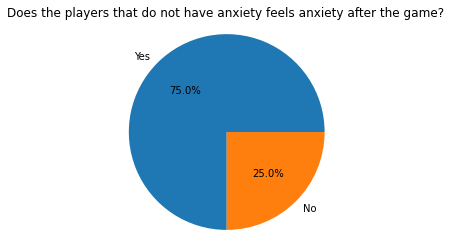

Total No. of players do not have anxiety : 8
Total No. of players do not have anxiety and feels anxiety : 6


In [90]:
# Those do not have anxiety but feel anxiety after this game

my_labels = 'Yes','No'
plt.pie(arraya,labels=my_labels,autopct='%1.1f%%')
plt.title('Does the players that do not have anxiety feels anxiety after the game?')
plt.axis('equal')
plt.show()

print('Total No. of players do not have anxiety :',countTotalNo)
print('Total No. of players do not have anxiety and feels anxiety :',count)